# Task-6: Time Series Analysis
Forecast future sales using ARIMA.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [3]:
# Load dataset
from datetime import datetime
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', periods=100, freq='D')
sales_data = np.random.poisson(lam=200, size=100) + np.linspace(0, 50, 100)
df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})
df.set_index('Date', inplace=True)
df.head()

,Sales
Date,
2022-01-01,202.000000
2022-01-02,204.505051
2022-01-03,198.010101
2022-01-04,198.515152
2022-01-05,241.020202


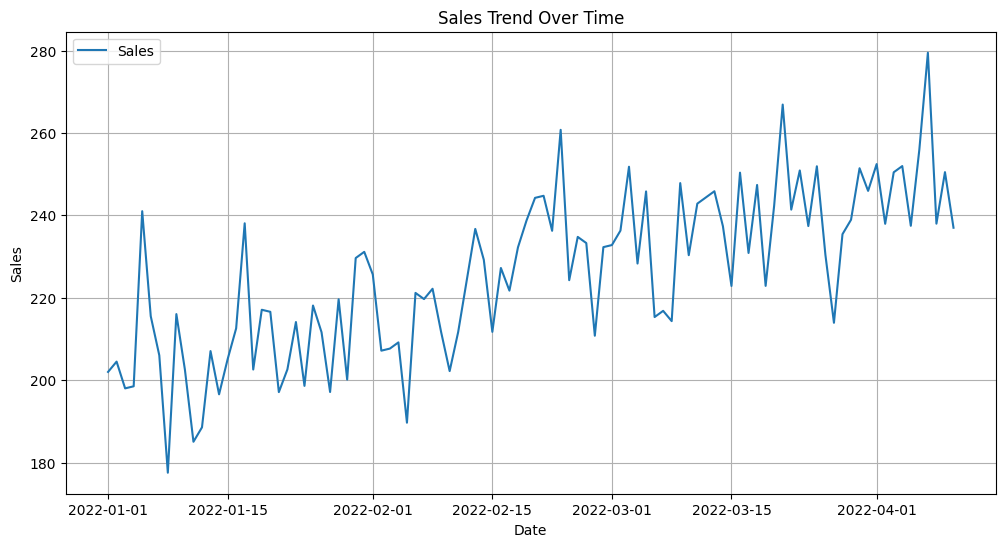

In [4]:
# Visualize sales trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [7]:
# Ensure Date index has frequency set to 'D' (daily)
train.index = pd.to_datetime(train.index)
train = train.asfreq('D')

test.index = pd.to_datetime(test.index)
test = test.asfreq('D')

# Train ARIMA model (example order, can be tuned)
model = ARIMA(train, order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Forecast the same number of steps as the test set
forecast = model_fit.forecast(steps=len(test))


In [10]:
# Evaluate forecast
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

# Print evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

RMSE: 13.36
MAPE: 0.04


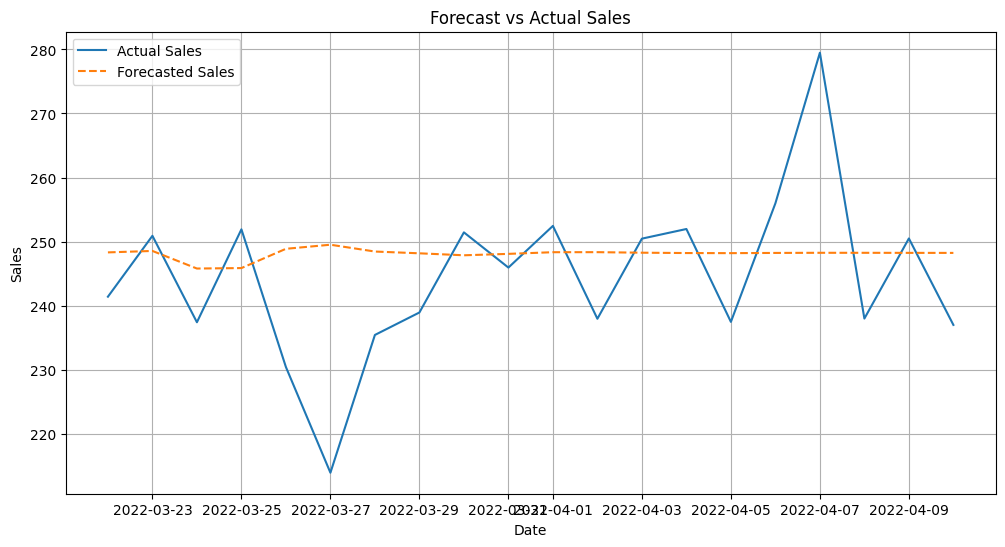

In [11]:
# Forecasting plot
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', linestyle='--')
plt.title('Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Forecasted sales table
forecast_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Sales': test['Sales'].values,
    'Forecasted_Sales': forecast.values
})
forecast_df.head()

,Date,Actual_Sales,Forecasted_Sales
0,2022-03-22,241.404040,248.320139
1,2022-03-23,250.909091,248.544968
2,2022-03-24,237.414141,245.799841
3,2022-03-25,251.919192,245.871829
4,2022-03-26,230.424242,248.879410
